In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df1 = pd.read_csv("data_set/Australian Vehicle Prices.csv")
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

## Feature Preparation

#### Defining EngineCapacity Feature

In [7]:
def get_engine_capacity(x):
    try:
        tokens = x.split(' ')
        return float(tokens[2])*1000
    except:
        return ''

In [8]:
df1['EngineCapacity'] = df1['Engine'].apply(get_engine_capacity)
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCapacity
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,2200.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,1500.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,2000.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,5500.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,1300.0


#### Defining Cylinders Feature

In [9]:
def get_cylinders(x):
    try:
        tokens = x.split(' ')
        return int(tokens[0])
    except:
        return ''

In [10]:
df1['Cylinders'] = df1['CylindersinEngine'].apply(get_cylinders)
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCapacity,Cylinders
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,2200.0,4
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,1500.0,4
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,...,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,2000.0,4
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,...,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,5500.0,8
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,...,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,1300.0,4


#### Droping &Renaming Features

In [11]:
df2 = df1[['Brand', 'Year', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType', 'EngineCapacity', 'Cylinders', 'Kilometres', 'Price']]
df2.rename(columns={'UsedOrNew':'Condition', 'Kilometres':'Mileage'},inplace=True)
df2

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\677268783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'UsedOrNew':'Condition', 'Kilometres':'Mileage'},inplace=True)


,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
0,Ssangyong,2022.0,DEMO,Automatic,AWD,Diesel,SUV,2200.0,4,5595,51990
1,MG,2022.0,USED,Automatic,Front,Premium,Hatchback,1500.0,4,16,19990
2,BMW,2022.0,USED,Automatic,Rear,Premium,Coupe,2000.0,4,8472,108988
3,Mercedes-Benz,2011.0,USED,Automatic,Rear,Premium,Coupe,5500.0,8,136517,32990
4,Renault,2022.0,USED,Automatic,Front,Unleaded,SUV,1300.0,4,1035,34990
...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,USED,Automatic,Front,Unleaded,Commercial,,,66000,29500
16730,Mercedes-Benz,2012.0,USED,Automatic,Rear,Diesel,NaN,,,117432,39888
16731,Suzuki,2022.0,DEMO,Automatic,Front,Unleaded,SUV,1600.0,4,5165,35280
16732,Mercedes-Benz,2016.0,USED,Automatic,AWD,Premium,SUV,2000.0,4,85525,41888


## Data Cleaning

#### Brand

In [12]:
df2['Brand'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Mercedes-Benz', 'Renault', 'Toyota',
       'Land', 'Nissan', 'Honda', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'Hyundai', 'Jeep', 'Volvo', 'Mazda', 'Abarth', 'Holden',
       'Audi', 'Kia', 'Mini', 'Peugeot', 'Suzuki', 'Dodge', 'Porsche',
       'Daihatsu', 'Isuzu', 'Lexus', 'Jaguar', 'Rolls-Royce', 'Skoda',
       'Fiat', 'Haval', 'Citroen', 'LDV', 'HSV', 'Foton', 'Mahindra',
       'Maserati', 'Alfa', 'GWM', 'Ram', 'Tesla', 'Genesis', 'Chrysler',
       'Great', 'Opel', 'Saab', 'Bentley', 'Rover', nan, 'Ferrari',
       'Cupra', 'Chevrolet', 'Lamborghini', 'FPV', 'McLaren', 'Chery',
       'Iveco', 'Hummer', 'Infiniti', 'BYD', 'Tata', 'Aston', 'Daewoo',
       'Proton', 'Geely', 'Smart', 'Ineos', 'Caterham', 'Hino',
       'International', 'Lotus', 'Polestar', 'Datsun', 'Packard'],
      dtype=object)

In [13]:
# check brands with less than 100 cars

brand_count = df2.groupby('Brand')['Brand'].agg('count')
brands_less_than_100_cars = brand_count[brand_count<100]
brands_less_than_100_cars


Brand
Abarth            3
Alfa             14
Aston             5
BYD               3
Bentley          12
Caterham          2
Chery            13
Chevrolet        13
Chrysler         26
Citroen          15
Cupra             9
Daewoo            1
Daihatsu         11
Datsun            1
Dodge            13
FPV               5
Ferrari           8
Fiat             36
Foton             4
Geely             1
Genesis          14
Great            16
HSV              44
Haval            22
Hino             26
Hummer            1
Ineos             4
Infiniti          3
International     2
Iveco            37
Jaguar           51
Lamborghini       2
Lotus             3
Mahindra         12
Maserati         16
McLaren           8
Mini             83
Opel              4
Packard           1
Peugeot          59
Polestar          1
Porsche          97
Proton            1
Ram              34
Rolls-Royce       1
Rover             3
Saab              2
Smart             1
Ssangyong        58
Tata          

In [14]:
# replace brands with less than 100 cars as a missing value

df2['Brand'] = df2['Brand'].apply(lambda x: np.nan if x in brands_less_than_100_cars else x)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\4146312331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Brand'] = df2['Brand'].apply(lambda x: np.nan if x in brands_less_than_100_cars else x)


In [15]:
# Check missing values
df2['Brand'].isnull().sum()

819

In [16]:
# Drop missing values
df2.dropna(subset = 'Brand', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\3238925416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset = 'Brand', inplace=True)


#### Year

In [17]:
df2['Year'].unique()

array([2022., 2011., 2004., 2017., 2000., 2013., 2014., 2009., 2018.,
       2015., 2016., 2012., 2023., 2005., 2019., 2021., 2007., 2010.,
       2003., 2008., 2006., 2020., 1999., 2002., 1995., 1997., 1993.,
       2001., 1998., 1996., 1994., 1989., 1990., 1981., 1991., 1985.,
       1970., 1984., 1975., 1992.])

In [18]:
# Check missing values
df2['Year'].isnull().sum()

0

In [19]:
# Convert the data type
df2['Year'] = df2['Year'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\2713083214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].astype(int)


#### Condition

In [20]:
df2['Condition'].unique()

array(['USED', 'NEW', 'DEMO'], dtype=object)

In [21]:
# Check missing values
df2['Condition'].isnull().sum()

0

In [22]:
# Drop values which Condition = DEMO 
df2.drop(df2[df2['Condition']=='DEMO'].index, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1231395166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['Condition']=='DEMO'].index, inplace=True)


#### Transmission

In [23]:
df2['Transmission'].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [24]:
# Replace missing values with NaN
df2['Transmission'].replace('-',np.nan,inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\2568074160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Transmission'].replace('-',np.nan,inplace=True)


In [25]:
# Check missing values
df2['Transmission'].isnull().sum()

198

In [26]:
# Drop missing values
df2.dropna(subset='Transmission', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1152171599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='Transmission', inplace=True)


#### DriveType

In [27]:
df2['DriveType'].unique()

array(['Front', 'Rear', 'Other', 'AWD', '4WD'], dtype=object)

In [28]:
# Check missing values
df2['DriveType'].isnull().sum()

0

#### FuelType

In [29]:
df2['FuelType'].unique()

array(['Premium', 'Unleaded', 'Diesel', 'Hybrid', '-', 'Other',
       'Electric', 'LPG', 'Leaded'], dtype=object)

In [30]:
# Replace missing values with NaN
df2['FuelType'].replace('-',np.nan,inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\2249803138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FuelType'].replace('-',np.nan,inplace=True)


In [31]:
# Check missing values
df2['FuelType'].isnull().sum()

436

In [32]:
# Drop missing values
df2.dropna(subset='FuelType', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1620605757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='FuelType', inplace=True)


#### BodyType

In [33]:
df2['BodyType'].unique()

array(['Hatchback', 'Coupe', 'SUV', 'Commercial', nan, 'Ute / Tray',
       'Sedan', 'Wagon', 'People Mover', 'Convertible', 'Other'],
      dtype=object)

In [34]:
# Replace Ute / Tray values with Ute Tray
df2['BodyType'].replace('Ute / Tray','Ute Tray',inplace=True)

# Replace missing values with NaN
df2['BodyType'].replace('-', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1062915734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BodyType'].replace('Ute / Tray','Ute Tray',inplace=True)
C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1062915734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BodyType'].replace('-', np.nan, inplace=True)


In [35]:
# Check missing values
df2['BodyType'].isnull().sum()

144

In [36]:
# Drop missing values
df2.dropna(subset='BodyType', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1828642278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='BodyType', inplace=True)


#### EngineCapacity

In [37]:
df2['EngineCapacity'].unique()

array([1500.0, 2000.0, 5500.0, 1300.0, '', 1600.0, 2700.0, 3000.0, 1400.0,
       1000.0, 2400.0, 2500.0, 1200.0, 1800.0, 4000.0, 3500.0, 2200.0,
       3200.0, 6000.0, 2300.0, 4100.0, 3600.0, 3300.0, 4200.0, 2800.0,
       4500.0, 3700.0, 2100.0, 4400.0, 5000.0, 1900.0, 4700.0, 1700.0,
       4600.0, 3800.0, 2900.0, 5400.0, 6200.0, 5600.0, 5700.0, 4900.0,
       7300.0, 3100.0, 2600.0, 4800.0, 3400.0, 4300.0, 6400.0, 7800.0,
       9800.0, 5200.0, 3900.0], dtype=object)

In [38]:
# Replace missing values with NaN
df2['EngineCapacity'].replace('', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1148236047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EngineCapacity'].replace('', np.nan, inplace=True)


In [39]:
# Check missing values
df2['EngineCapacity'].isnull().sum()

985

In [40]:
# Drop missing values
df2.dropna(subset='EngineCapacity', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\411694984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='EngineCapacity', inplace=True)


In [41]:
# Convert the data type
df2['EngineCapacity'] = df2['EngineCapacity'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\3883482411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EngineCapacity'] = df2['EngineCapacity'].astype(int)


#### Cylinders

In [42]:
df2['Cylinders'].unique()

array([4, 8, 3, 6, 5, 12, 2, 10], dtype=object)

In [43]:
# check missing values
df2['Cylinders'].isnull().sum()

0

In [44]:
# Convert the data type
df2['Cylinders'] = df2['Cylinders'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\3363290256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cylinders'] = df2['Cylinders'].astype(int)


#### Mileage

In [45]:
df2[(df2['Mileage']=='-') | (df2['Mileage']=='- / -')]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
2250,Volkswagen,2023,NEW,Automatic,AWD,Premium,SUV,2000,4,-,85990
2431,Renault,2023,NEW,Automatic,Front,Unleaded,SUV,2500,4,-,46888
2686,Volkswagen,2022,NEW,Automatic,AWD,Premium,Wagon,2000,4,-,68990
2738,Volkswagen,2022,NEW,Automatic,AWD,Premium,SUV,2000,4,-,52490
3002,Volkswagen,2023,NEW,Automatic,AWD,Premium,Wagon,2000,4,-,74990
...,...,...,...,...,...,...,...,...,...,...,...
16603,Mazda,2023,NEW,Automatic,Front,Unleaded,SUV,2500,4,-,60376
16629,Suzuki,2022,NEW,Manual,Front,Unleaded,Hatchback,1400,4,-,34690
16642,Suzuki,2022,NEW,Automatic,Front,Premium,SUV,1200,4,-,24485
16651,Suzuki,2022,NEW,Automatic,Front,Unleaded,Hatchback,1200,4,-,27690


In [46]:
# Replace missing values with NaN
df2['Mileage'].replace(['-', '- / -'], np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\3340717015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'].replace(['-', '- / -'], np.nan, inplace=True)


In [47]:
# Assign 0 for Mileage when Condition is NEW
df2['Mileage'] = df2.apply(lambda x: 0 if x['Condition'] == 'NEW' else x['Mileage'], axis=1)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1717817696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2.apply(lambda x: 0 if x['Condition'] == 'NEW' else x['Mileage'], axis=1)


In [48]:
# Check values with Mileage is missing and Condition = 'USED'
((df2['Mileage'].isnull()) & (df2['Condition']=='USED')).sum()

7

In [49]:
# Drop values with Mileage is missing and Condition = 'USED'
df2.drop(df2[(df2['Mileage'].isnull()) & (df2['Condition']=='USED')].index, axis=0, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\37530964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2['Mileage'].isnull()) & (df2['Condition']=='USED')].index, axis=0, inplace=True)


In [50]:
# Convert data type
df2['Mileage'] = df2['Mileage'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\2744635594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2['Mileage'].astype(int)


#### Price

In [51]:
# Replace missing values with NaN
df2['Price'].replace('POA', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\2460696471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'].replace('POA', np.nan, inplace=True)


In [52]:
# Check missing values
(df2['Price'].isnull()).sum()

26

In [53]:
# Drop missing values
df2.dropna(subset='Price', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1359655473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='Price', inplace=True)


In [54]:
# Convert data type
df2['Price'] = df2['Price'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_10156\1764676764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df2['Price'].astype(int)


## Outliers Handling

In [55]:
df3 = df2.copy()
df3.head()

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
1,MG,2022,USED,Automatic,Front,Premium,Hatchback,1500,4,16,19990
2,BMW,2022,USED,Automatic,Rear,Premium,Coupe,2000,4,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,Rear,Premium,Coupe,5500,8,136517,32990
4,Renault,2022,USED,Automatic,Front,Unleaded,SUV,1300,4,1035,34990
6,Land,2017,USED,Automatic,AWD,Diesel,SUV,2000,4,67662,62280


In [56]:
# define a function to get the outliers

def detect_outliers(x):
    
    outliers = []
    
    check_list = x.to_numpy()         # get pandas dataframe column to a new list (to avoid the index missing issue)
    
    q1 = np.quantile(check_list, .25)     # first quantile(25%)
    q3 = np.quantile(check_list, .75)     # third quantile(75%)
    
    iqr = q3-q1                       # inter quantile value
    l_bound = q1-iqr*1.5              # lower bound value
    u_bound = q3+iqr*1.5              # uper bound value
    
    for i in range(len(check_list)):
        if (check_list[i] < l_bound or check_list[i] > u_bound):
            outliers.append(check_list[i])
           
    return outliers
    

#### Year

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


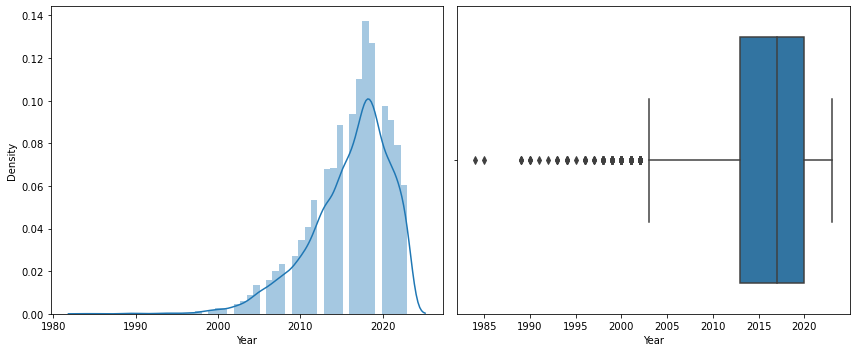

In [57]:
# visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.distplot(df3["Year"], ax=axes[0])
sns.boxplot(df3["Year"], ax=axes[1])

plt.tight_layout()
plt.show()

In [58]:
# Identify outliers
year_outliers = sorted(detect_outliers(df3['Year']))
year_outliers

[1984,
 1985,
 1989,
 1989,
 1989,
 1990,
 1990,
 1990,
 1991,
 1992,
 1993,
 1993,
 1993,
 1994,
 1994,
 1994,
 1994,
 1994,
 1995,
 1996,
 1996,
 1996,
 1996,
 1996,
 1996,
 1997,
 1997,
 1997,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,

In [59]:
# Drop rows where the year is before 2000
df3.drop(df3[df3['Year']<2000].index, inplace=True)

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

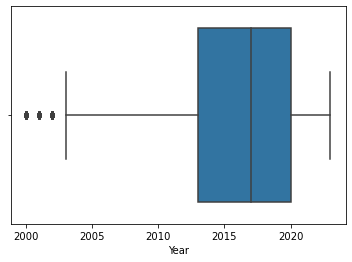

In [60]:
# visualize after dropping outliers
sns.boxplot(df3["Year"])

#### EngineCapacity

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineCapacity'>

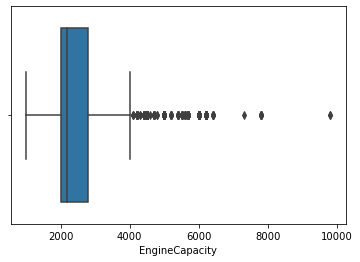

In [61]:
# visualize outliers
sns.boxplot(df3['EngineCapacity'])

In [62]:
# rows with EngineCapacity > 7000
df3[df3['EngineCapacity']>7000]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
3794,Ford,2002,USED,Automatic,4WD,Diesel,Ute Tray,7300,8,179999,79900
14922,Isuzu,2023,NEW,Automatic,4WD,Diesel,Ute Tray,7800,6,0,210992
14961,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,9800,6,0,240754
14982,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,184564
15137,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,221527
15145,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,9800,6,0,293131
15179,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,197239
15193,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,7800,6,0,138457
15198,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,7800,6,0,195100
15328,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,131088


In [63]:
# Remove rows with EngineCapacity > 7000
df3.drop(df3[df3['EngineCapacity']>7000].index, inplace=True)

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineCapacity'>

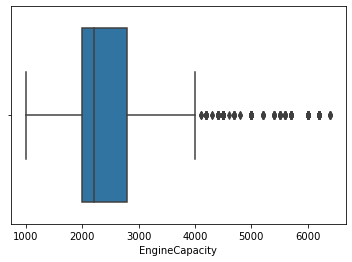

In [64]:
# visualize after dropping outliers
sns.boxplot(df3["EngineCapacity"])

#### Cylinders

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders'>

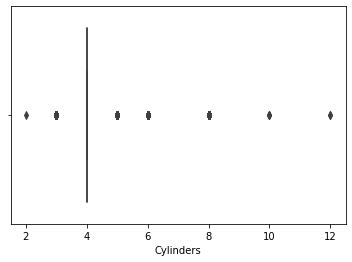

In [65]:
#  Visualize outliers
sns.boxplot(df3['Cylinders'])

#### Mileage

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


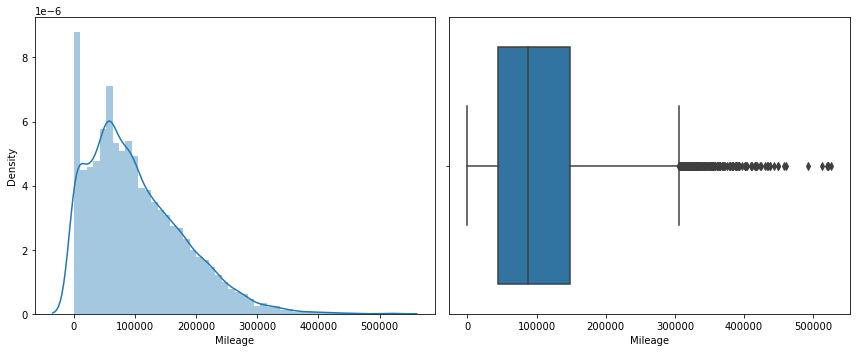

In [66]:
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.distplot(df3["Mileage"], ax=axes[0])
sns.boxplot(df3["Mileage"], ax=axes[1])

plt.tight_layout()
plt.show()

In [67]:
# rows with Mileage < 20km
df3[df3['Mileage']<20]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
1,MG,2022,USED,Automatic,Front,Premium,Hatchback,1500,4,16,19990
22,Volkswagen,2023,NEW,Automatic,AWD,Diesel,Ute Tray,3000,6,0,83887
71,Volkswagen,2023,NEW,Automatic,AWD,Premium,SUV,2000,4,0,56887
482,MG,2022,NEW,Automatic,Front,Premium,Hatchback,1500,4,0,19490
898,Mazda,2023,NEW,Automatic,Front,Unleaded,SUV,2000,4,0,42288
...,...,...,...,...,...,...,...,...,...,...,...
16649,Mazda,2023,NEW,Automatic,Front,Unleaded,SUV,2500,4,0,69200
16651,Suzuki,2022,NEW,Automatic,Front,Unleaded,Hatchback,1200,4,0,27690
16654,Hyundai,2023,NEW,Automatic,Front,Unleaded,SUV,2000,4,0,44360
16661,Hyundai,2023,NEW,Automatic,Front,Premium,SUV,2000,4,0,57600


In [68]:
# Remove rows with Mileage < 50km
df3.drop(df3[df3['Mileage']<20].index, inplace=True)

#### Price

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


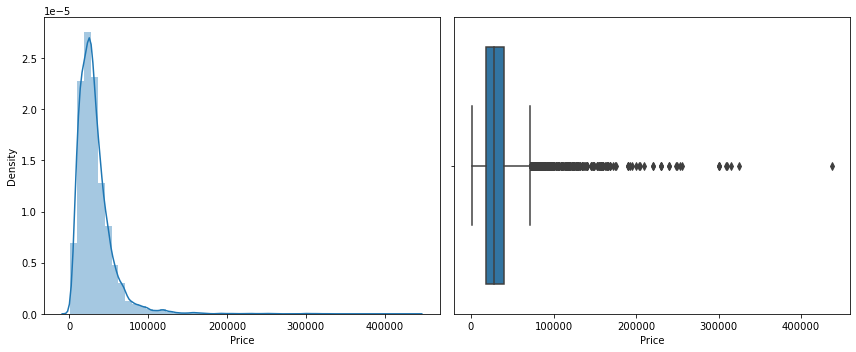

In [69]:
# Visualize outliers

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.distplot(df3["Price"], ax=axes[0])
sns.boxplot(df3["Price"], ax=axes[1])

plt.tight_layout()
plt.show()

In [70]:
# rows with Price < $500
df3[df3['Price']<500]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price


In [71]:
# Remove rows with Price < $500
df3.drop(df3[df3['Price']<500].index, inplace=True)

#### Brand

<AxesSubplot:xlabel='Price', ylabel='Brand'>

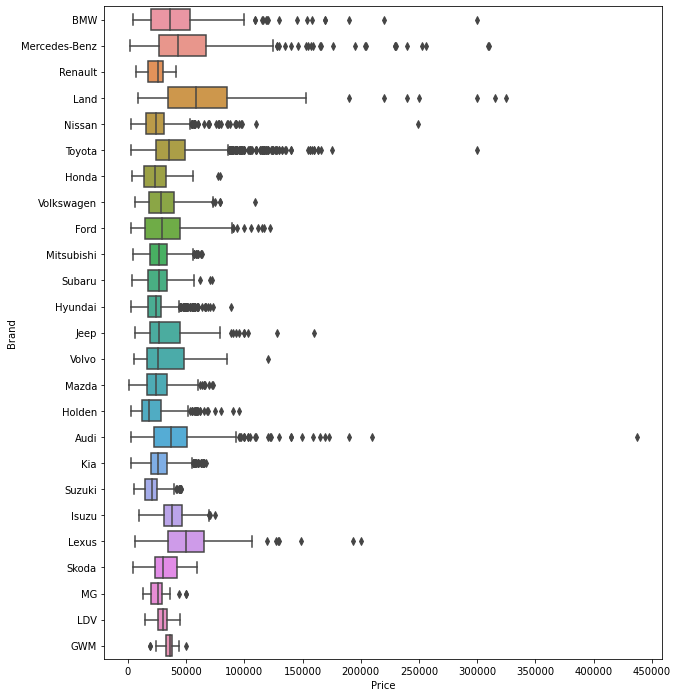

In [72]:
# Visualize outliers
plt.figure(figsize=(10,12))
plt.xticks(range(0, 500000, 50000))
sns.boxplot(data=df3, x='Price', y='Brand')


In [73]:
# define a function for return indexes of the outliers of Brand
# here, values which are not in 3 x interquantile_range supposed as outliers

def brand_outliers():
    
    outlier_index_list = []
    
    
    for i in df3.index:
        
        price_list = df3[df3['Brand']==df3.loc[i]['Brand']]['Price']
        
        
        q1 = np.quantile(price_list, .25)     # first quantile(25%)
        q3 = np.quantile(price_list, .75)     # third quantile(75%)
    
        iqr = q3-q1                    # inter quantile value
        l_bound = q1-iqr*3             # lower bound value
        u_bound = q3+iqr*3             # uper bound value
        
        if (df3.loc[i]['Price'] < l_bound or df3.loc[i]['Price'] > u_bound):
            outlier_index_list.append(i)
    
    return outlier_index_list


brand_outlier_list = brand_outliers() # Apply function
    

In [74]:
# number of outliers
len(brand_outlier_list)

91

In [75]:
# remove outliers
df3.drop(brand_outlier_list, axis=0, inplace=True)

<AxesSubplot:xlabel='Price', ylabel='Brand'>

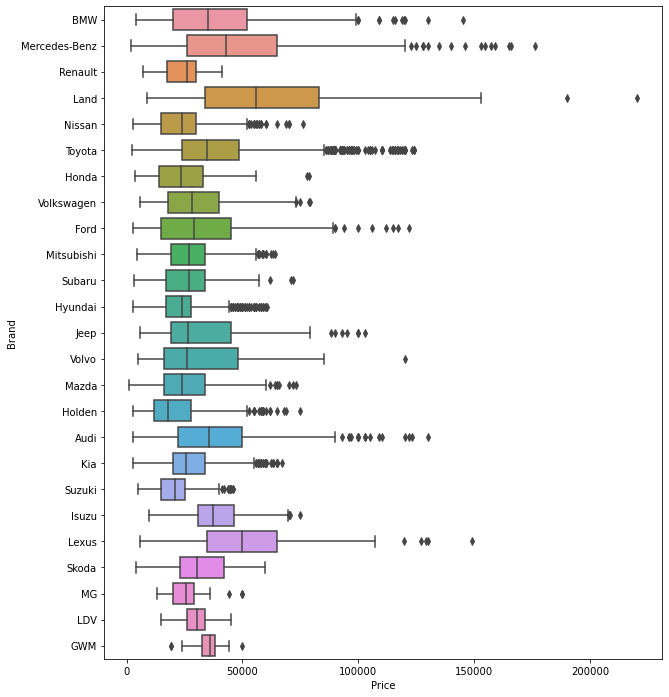

In [76]:
# visualize after dropping outliers
plt.figure(figsize=(10,12))
plt.xticks(range(0, 500000, 50000))
sns.boxplot(data=df3, x='Price', y='Brand')

## Feature Encording

In [77]:
df3.head()

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
2,BMW,2022,USED,Automatic,Rear,Premium,Coupe,2000,4,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,Rear,Premium,Coupe,5500,8,136517,32990
4,Renault,2022,USED,Automatic,Front,Unleaded,SUV,1300,4,1035,34990
6,Land,2017,USED,Automatic,AWD,Diesel,SUV,2000,4,67662,62280
7,Nissan,2000,USED,Automatic,Front,Unleaded,Hatchback,1600,4,300539,2995


In [78]:
# Apply one-hot encording for convert categorical features to numerical features

cat_features = df3.select_dtypes(include=['object']) # categotical features

dummy_features = pd.get_dummies(cat_features, drop_first=True) # (drop_first=True is used to drop one column from dummy variables to avoid multicollinearity issues, that variable can be derived from others)

df4 = pd.concat([df3,dummy_features], axis=1).drop(cat_features.columns, axis=1) # combine categotical and numerical features together
df4

,Year,EngineCapacity,Cylinders,Mileage,Price,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
2,2022,2000,4,8472,108988,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,5500,8,136517,32990,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2022,1300,4,1035,34990,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,2017,2000,4,67662,62280,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2000,1600,4,300539,2995,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,2009,2500,4,182254,16000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16727,2015,1600,4,54359,21450,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16728,2021,2000,4,32977,36770,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
16732,2016,2000,4,85525,41888,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Model Building & Evaluation

In [79]:
df4.head()

,Year,EngineCapacity,Cylinders,Mileage,Price,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
2,2022,2000,4,8472,108988,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,5500,8,136517,32990,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2022,1300,4,1035,34990,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,2017,2000,4,67662,62280,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2000,1600,4,300539,2995,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [80]:
# Define independent(x) and dependent(y) variables

X = df4.drop('Price', axis=1)
y = df4['Price']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### Feature Scaling

In [82]:
# Apply scaling to numerical features

scaler = StandardScaler()

X_train[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']] = scaler.fit_transform(X_train[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']])
X_test[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']] = scaler.transform(X_test[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']])

In [83]:
pd.DataFrame(X_train, columns=X.columns) # X_train data after scaling

,Year,EngineCapacity,Cylinders,Mileage,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,Brand_Hyundai,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
9560,0.496137,0.124997,-0.430754,-1.156896,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6843,-0.612188,0.993252,0.601921,1.429150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
420,0.052807,0.993252,0.601921,1.554763,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16455,-0.168858,0.000961,-0.430754,0.599938,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16033,0.939467,-0.247112,-0.430754,-0.694460,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,-1.498848,1.489398,1.634597,2.251008,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9183,-3.050503,0.745179,-0.430754,1.792792,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4228,0.496137,-1.115366,-0.430754,-0.286408,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
12000,0.717802,-0.247112,-0.430754,-0.622422,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Linear Regression Model

In [88]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Prediction results & score

y_pred_lr = lr_model.predict(X_test)

print('Mean_Squared_Error: ', mean_squared_error(y_test, y_pred_lr))
print('mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred_lr))
print('R2_Score: ', r2_score(y_test, y_pred_lr))
print('Accuracy of the Model : 75%')

Mean_Squared_Error:  90568703.92532107
mean_Absolute_Error:  6633.6667109627815
R2_Score:  0.7511982625314115
Accuracy of the Model : 75%


#### Random Forest Regression Model

In [101]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
y_pred_rfr = rfr_model.predict(X_test)

print('Mean_Squared_Error: ', mean_squared_error(y_test, y_pred_rfr))
print('mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred_rfr))
print('R2_Score: ', r2_score(y_test, y_pred_rfr))
print('Accuracy of the Model : 90%')

Mean_Squared_Error:  36820358.810988024
mean_Absolute_Error:  3936.2469087581703
R2_Score:  0.8988506089924352
Accuracy of the Model : 90%
